## Part 1 - Data Analysis and Bayes Nets

### 1) Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

Loading only the training set for Part 1 of the coursework

In [6]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)

    return x_train_all, y_train_all

In [7]:
x_train, y_train = load_train_data()

In [8]:
x_train.shape

(9690, 2304)

Analysing the dataset

In [9]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [10]:
y_train.shape

(9690, 1)

In [11]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [12]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [14]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [15]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [16]:
y_train.isna().any().any()

False

In [17]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [18]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [19]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: 0, dtype: int64

Visualising the dataset using graphs

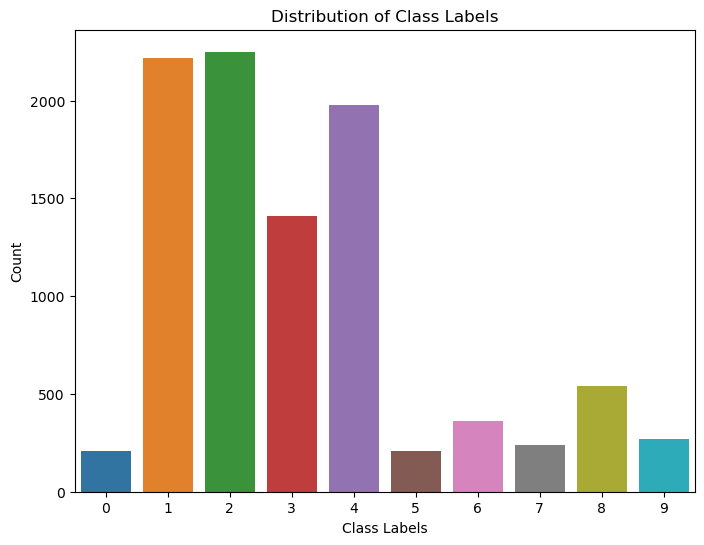

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

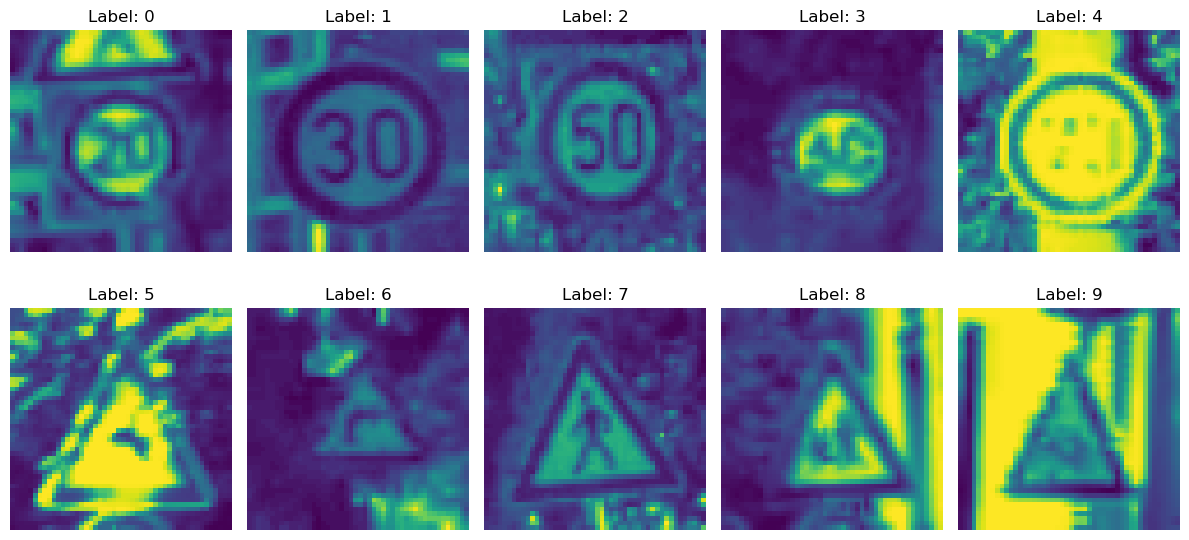

In [21]:
label_images = {}

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        label_images[label] = row.values.reshape(48, 48)  
    
    if len(label_images) == 10:
        break

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image)
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

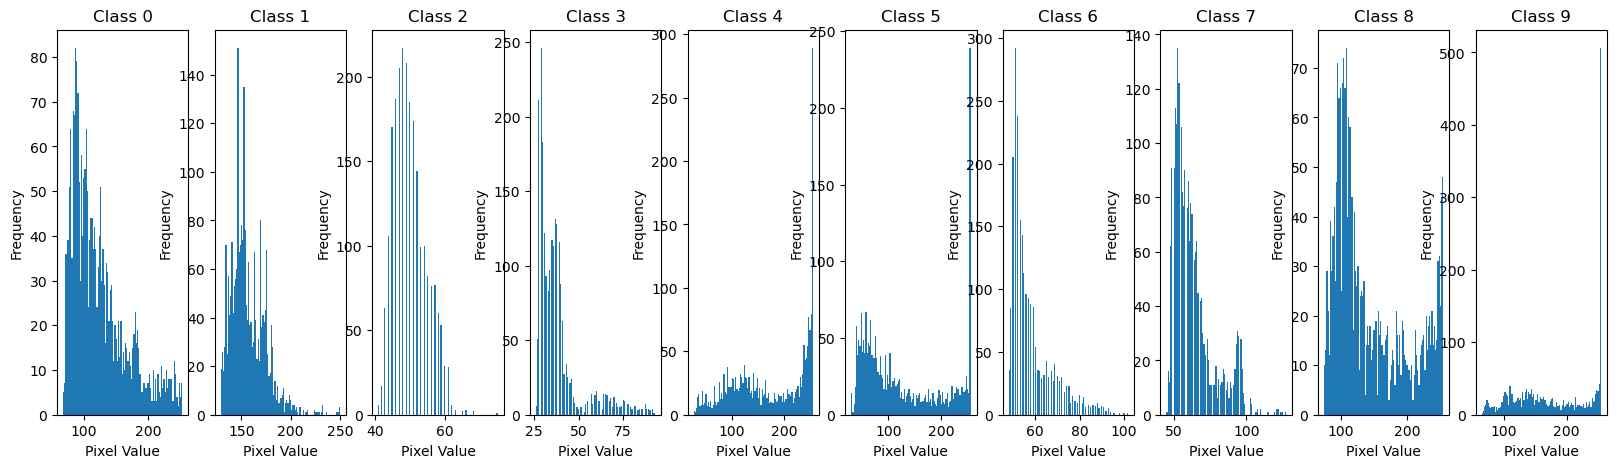

In [22]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select an image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        img = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the image of each class
        axes[i].hist(img, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()

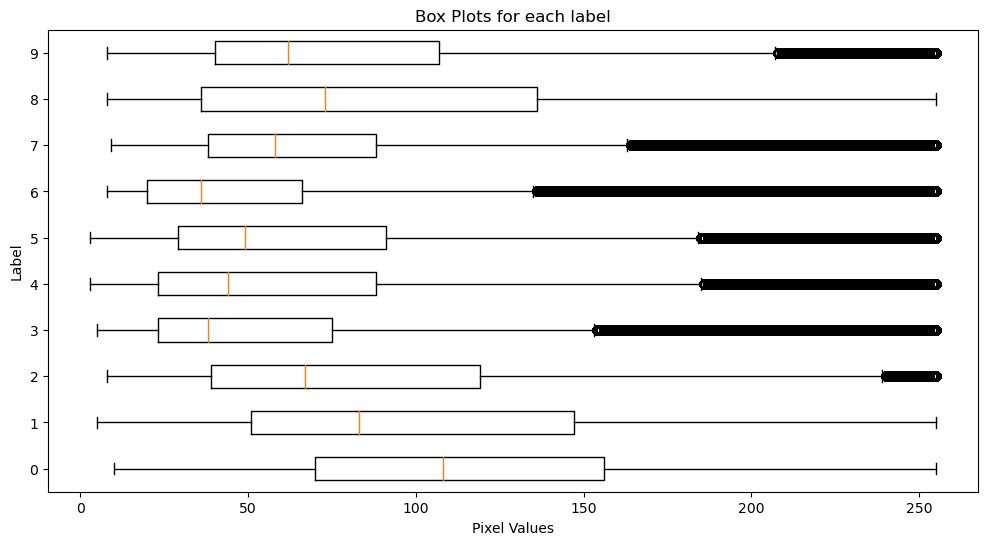

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [23]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

label_images = {}

num_images_per_label = {}

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    label_images[label].append(image_data)

    num_images_per_label[label] = len(label_images[label])

box_data = np.array(list(label_images.values()), dtype=object)

labels = list(label_images.keys())

# box plots for each label 
plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()

for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

In [24]:
onevrall_x_train = pd.DataFrame(x_train) 
no_aug_y_train = pd.DataFrame(y_train)
print(x_train.shape, y_train.shape)

(9690, 2304) (9690, 1)


### 2) Preprocessing the Train Dataset

#### 2.1) Categorical Naïve Bayes Classifier

In [25]:
# Created a list to store the labels that have less number of pictures
less_class_labels = [0, 5, 6, 7, 8, 9]

data_list = []
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]
    image_data = row.values.reshape(48, 48)

    if label in less_class_labels:
        data_list.append((image_data, label))

subset_dataset = np.array(data_list, dtype=object)

print(subset_dataset.shape)

num_images_per_label = {label: np.sum(subset_dataset[:, 1] == label) for label in less_class_labels}

for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

(1830, 2)
Label 0: 210 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [26]:
def add_noise(feature_vector, noise_level=0.01):
    noise = np.random.normal(0, noise_level, feature_vector.shape)
    noisy_vector = feature_vector + noise
    return noisy_vector

In [27]:
def introduce_perturbations(feature_vector, perturbation_level=0.02):
    min_value = np.min(feature_vector)
    max_value = np.max(feature_vector)
    perturbations = np.random.uniform(-perturbation_level, perturbation_level, feature_vector.shape)
    perturbed_vector = feature_vector + perturbations * (max_value - min_value)
    return perturbed_vector

In [28]:
print(x_train.shape)
print(y_train.shape)
print('------------------------')

augmented_data = []
new_augmented_data = []
labels_for_train = []
for data, label in subset_dataset:
    noisy_vector = add_noise(data, noise_level=0.01)  
    perturbed_vector = introduce_perturbations(data, perturbation_level=0.02)  
    
    # Append the original and augmented data with their respective labels
    augmented_data.append((data, label))
    augmented_data.append((noisy_vector, label))
    augmented_data.append((perturbed_vector, label))

# Convert the appended data to a NumPy array
for image_vectors, label_col in augmented_data:
    new_augmented_data.append(image_vectors)
    labels_for_train.append(label_col)

new_augmented_data = np.array(new_augmented_data)
labels_for_train = np.array(labels_for_train)

new_labels = labels_for_train.reshape(-1, 1)

new_augmented_data = new_augmented_data.reshape(new_augmented_data.shape[0], -1)

print(new_augmented_data.shape)
print(new_labels.shape)
print('------------------------')
if new_augmented_data.shape[1] == x_train.shape[1]:
    cnb_x_train = np.vstack((x_train, new_augmented_data))
    cnb_y_train = np.concatenate((y_train, new_labels))
else:
    print("Number of columns in appended_data doesn't match x_train.")

print(cnb_x_train.shape)
print(cnb_y_train.shape)

(9690, 2304)
(9690, 1)
------------------------


(5490, 2304)
(5490, 1)
------------------------
(15180, 2304)
(15180, 1)


#### 2.1) Gaussian Naïve Bayes Classifier

In [29]:
from scipy.stats.mstats import winsorize
x_train = np.array(x_train)

# Winsorize the data (adjust percentiles as needed)
winsorized_data = winsorize(x_train, limits=[0.05, 0.05])

def normalise(images):
    preprocessed_images = []
    for image in images: 
        if(len(image.shape) == 3):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)

        adjusted = cv2.convertScaleAbs(image, alpha=1.7, beta = 90)
        enhanced_image = cv2.equalizeHist(adjusted)
        image = enhanced_image/255.0
        resize = cv2.resize(image, (48,48))

        preprocessed_images.append(resize)
    return  np.array(preprocessed_images)


x_train = normalise(x_train)

x_train = x_train.reshape(x_train.shape[0], -1)
x_train.shape

(9690, 2304)

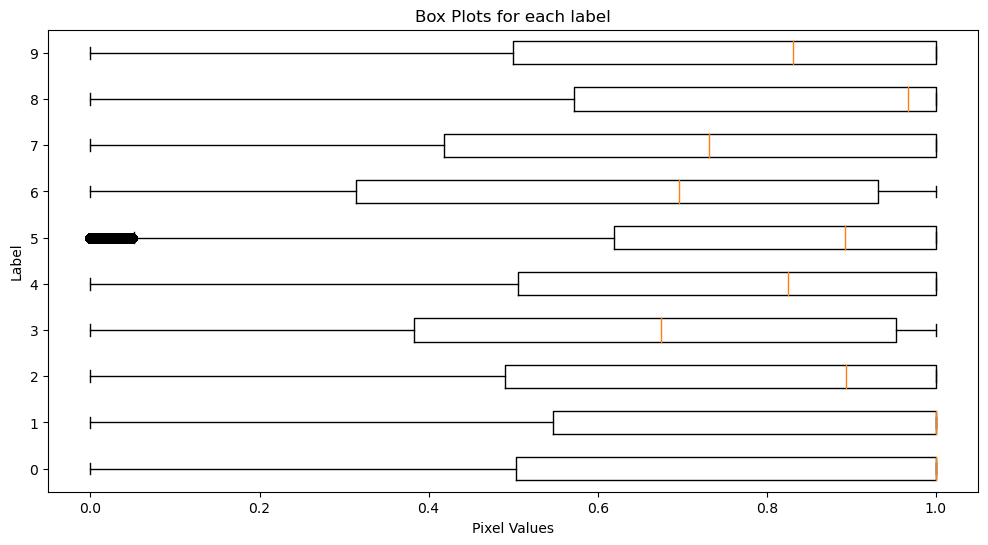

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [30]:
label_images = {}

num_images_per_label = {}

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    label_images[label].append(image_data)

    num_images_per_label[label] = len(label_images[label])

box_data = np.array(list(label_images.values()), dtype=object)

labels = list(label_images.keys())

plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()

for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

In [31]:
print(x_train.shape)
print(y_train.shape)

augmented_data = []
new_augmented_data = []
labels_for_train = []
for data, label in subset_dataset:
    noisy_vector = add_noise(data, noise_level=0.01)  
    perturbed_vector = introduce_perturbations(data, perturbation_level=0.02)  
    
        # Append the original and augmented data with their respective labels
    augmented_data.append((data, label))
    augmented_data.append((noisy_vector, label))
    augmented_data.append((perturbed_vector, label))

# Convert the appended data to a NumPy array
for image_vectors, label_col in augmented_data:
    new_augmented_data.append(image_vectors)
    labels_for_train.append(label_col)

new_augmented_data = np.array(new_augmented_data)
labels_for_train = np.array(labels_for_train)

new_labels = labels_for_train.reshape(-1, 1)

new_augmented_data = new_augmented_data.reshape(new_augmented_data.shape[0], -1)

print(new_augmented_data.shape)
print(new_labels.shape)
if new_augmented_data.shape[1] == x_train.shape[1]:
    x_train = np.vstack((x_train, new_augmented_data))
    y_train = np.concatenate((y_train, new_labels))
else:
    print("Number of columns in appended_data doesn't match x_train.")

print(x_train.shape)
print(y_train.shape)

(9690, 2304)
(9690, 1)
(5490, 2304)
(5490, 1)
(15180, 2304)
(15180, 1)


In [32]:
rotation_angle = 15
scale_factor = 1.2

rotated_images = []

for image in x_train:
    image = image.reshape(48, 48)  
    rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, scale_factor), (image.shape[1], image.shape[0]))
    rotated_images.append(rotated_image)

x_train = np.asarray(rotated_images)

x_train = x_train.reshape(x_train.shape[0], -1)
x_train.shape

(15180, 2304)

In [33]:
from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np

# Additional Pre processing
def preprocess_data(data):
    preprocessed_images = []
    
    for image in data:
        # Reshaping the image to its original shape
        image = image.reshape(48, 48)
        
        # Apply Gaussian blur to reduce noise
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
        
        # Apply sharpening filter to enhance image details
        sharpened_image = cv2.filter2D(blurred_image, -1, np.array([[-1, -1, -1],
                                                                    [-1,  9, -1],
                                                                    [-1, -1, -1]]))
        
        # Standardize pixel values using StandardScaler
        scaler = StandardScaler()
        standardized_image = scaler.fit_transform(sharpened_image)
        
        # Append the preprocessed image to the list
        preprocessed_images.append(standardized_image)
    
    preprocessed_data = np.asarray(preprocessed_images)
    
    # Reshape the data back to the flattened format
    preprocessed_data = preprocessed_data.reshape(preprocessed_data.shape[0], -1)
    
    return preprocessed_data

x_train = preprocess_data(x_train)
print(x_train.shape)

(15180, 2304)


### 3) Running Naïve Bayes Classifier on Train Dataset

#### 3.1) Categorical Naïve Bayes Classifier

In [34]:
from sklearn.naive_bayes import CategoricalNB

cnb_x_train = np.asarray(cnb_x_train)
xtrain_images = cnb_x_train.reshape(cnb_x_train.shape[0], -1)
cnb_y_train = np.asarray(cnb_y_train).ravel()
clf = CategoricalNB()
clf.fit(xtrain_images,cnb_y_train)

predictions = clf.predict(cnb_x_train)

#### 3.2) Gaussian Naïve Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

x_train = np.asarray(x_train)
xtrain_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()
clf2 = GaussianNB()
clf2.fit(xtrain_images, y_train)

predictions_gb = clf2.predict(x_train)

### 4) Evaluation Metrics for the Naïve Bayes Classifier on Dataset

#### 4.1) Categorical Naïve Bayes Classifier

In [36]:
from sklearn.metrics import classification_report

report = classification_report(cnb_y_train, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       840
           1       0.65      0.74      0.69      2220
           2       0.73      0.65      0.69      2250
           3       0.41      0.71      0.52      1410
           4       0.82      0.25      0.38      1980
           5       0.96      0.82      0.88       840
           6       0.65      0.73      0.69      1440
           7       0.85      0.89      0.87       960
           8       0.98      0.66      0.79      2160
           9       0.60      0.97      0.74      1080

    accuracy                           0.69     15180
   macro avg       0.74      0.74      0.71     15180
weighted avg       0.74      0.69      0.68     15180



In [37]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy = accuracy_score(cnb_y_train, predictions)
print('Accuracy = ', accuracy)

Accuracy =  0.691304347826087


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(cnb_y_train, predictions)
confusion_matrix

array([[ 820,    1,    9,    2,    4,    0,    0,    3,    1,    0],
       [  76, 1634,  183,  182,   25,    0,   18,   37,    2,   63],
       [  71,  190, 1469,  315,   19,    0,  113,   14,    0,   59],
       [   4,  129,   64,  998,   44,    0,   83,   10,    3,   75],
       [  63,  463,  257,  400,  493,   32,  147,   14,    0,  111],
       [   5,   14,    0,   70,    0,  685,   29,    2,   12,   23],
       [   0,   39,   20,   93,    0,    0, 1058,   63,    4,  163],
       [   3,    0,    0,   93,    2,    0,    0,  859,    0,    3],
       [  19,   36,   24,  253,   15,    0,  167,   11, 1426,  209],
       [   2,    3,    0,   15,    0,    0,    8,    0,    0, 1052]],
      dtype=int64)

<Axes: >

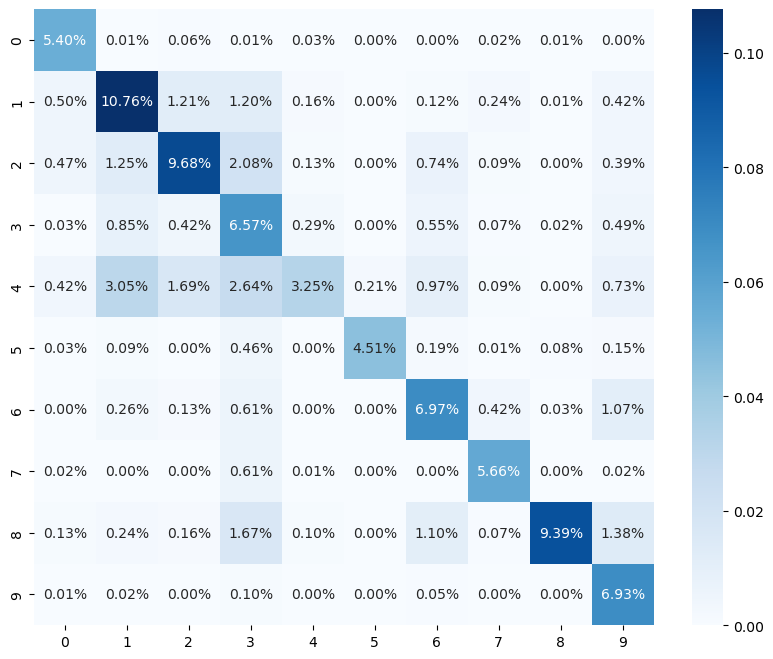

In [39]:
#Reference : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

import seaborn as sns
plt.figure(figsize=(10, 8)) 
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,  fmt='.2%', cmap='Blues')

In [40]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.9761904761904762, 
FP Rate = 0.016945606694560668
Class 1: 
TP Rate = 0.7360360360360361, 
FP Rate = 0.06751543209876543
Class 2: 
TP Rate = 0.6528888888888889, 
FP Rate = 0.04307811291569992
Class 3: 
TP Rate = 0.7078014184397163, 
FP Rate = 0.10334059549745825
Class 4: 
TP Rate = 0.24898989898989898, 
FP Rate = 0.008257575757575757
Class 5: 
TP Rate = 0.8154761904761905, 
FP Rate = 0.0022315202231520223
Class 6: 
TP Rate = 0.7347222222222223, 
FP Rate = 0.04112081513828239
Class 7: 
TP Rate = 0.8947916666666667, 
FP Rate = 0.010829817158931084
Class 8: 
TP Rate = 0.6601851851851852, 
FP Rate = 0.0016897081413210445
Class 9: 
TP Rate = 0.9740740740740741, 
FP Rate = 0.0500709219858156


In [41]:
specificity = []
unique_labels = np.unique(cnb_y_train)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.9830543933054393
Label 1 specificity: 0.9324845679012346
Label 2 specificity: 0.9569218870843
Label 3 specificity: 0.8966594045025418
Label 4 specificity: 0.9917424242424242
Label 5 specificity: 0.997768479776848
Label 6 specificity: 0.9588791848617176
Label 7 specificity: 0.989170182841069
Label 8 specificity: 0.9983102918586789
Label 9 specificity: 0.9499290780141844


In [42]:
from sklearn.metrics import recall_score

sensitivity = recall_score(cnb_y_train, predictions, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.9761904761904762
Label 1 sensitivity: 0.7360360360360361
Label 2 sensitivity: 0.6528888888888889
Label 3 sensitivity: 0.7078014184397163
Label 4 sensitivity: 0.24898989898989898
Label 5 sensitivity: 0.8154761904761905
Label 6 sensitivity: 0.7347222222222223
Label 7 sensitivity: 0.8947916666666667
Label 8 sensitivity: 0.6601851851851852
Label 9 sensitivity: 0.9740740740740741


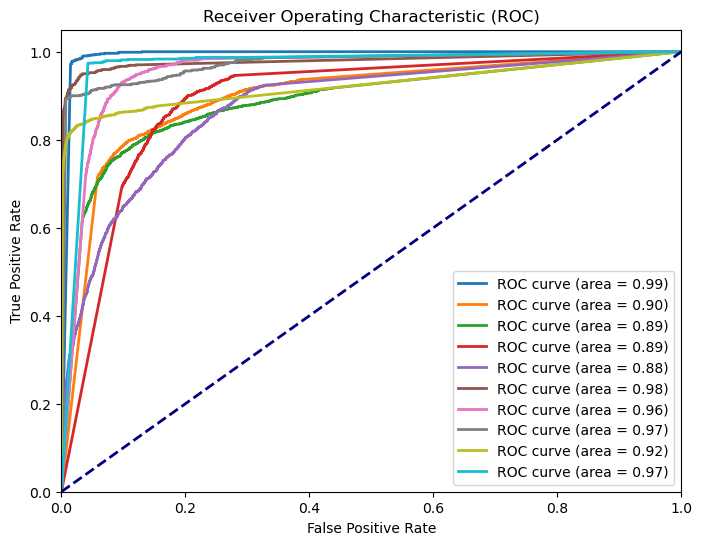

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(cnb_x_train)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((cnb_y_train == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##### Evaluation Using Cross-Validation

We had manually created our own cross-validation which divides our dataset into folds and iteratively trains and evaluates our Categorical NB classifier on each fold. We also tried the cross-validation technique of sklearn module.

But we found that we kept having an error with the cross-validation even though we achieved high accuracy. There were 2 reasons:

1) Our dataset only had Numeric/Continuous data and had no categorical data. We later discovered the actual purpose of a Categorical NB Classifier through this evaluation, that is Categorical NB can only be used categorical data like gender, color, etc.

In [44]:
data_types = pd.DataFrame(cnb_x_train).dtypes
numeric_columns = data_types[data_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))].index
categorical_columns = data_types[data_types.apply(lambda x: not pd.api.types.is_numeric_dtype(x))].index

print("Numeric (Continuous) Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric (Continuous) Columns:
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303],
           dtype='int64', length=2304)

Categorical Columns:
Int64Index([], dtype='int64')


2. The 2nd reason is listed below:

In [45]:
x_num_features = cnb_x_train.shape[1]
num_features_expected = len(clf.n_categories_)
list_features = clf.n_categories_
print(f"The CategoricalNB model takes {x_num_features} as input and as shown expects {num_features_expected} features.")
print(f"But if you look at the actual categories,", list_features)
print(f"It is converting each of our images into these categories: ", list(set(list_features)))
print("Due to this, we had an error for cross-validation. And due to this we discovered how categorical NB")
print("actually works and why we were having a very good accuracy.")

The CategoricalNB model takes 2304 as input and as shown expects 2304 features.
But if you look at the actual categories, [260 260 260 ... 260 260 260]
It is converting each of our images into these categories:  [256, 257, 258, 259, 260]
Due to this, we had an error for cross-validation. And due to this we discovered how categorical NB
actually works and why we were having a very good accuracy.


#### 4.2) Gaussian Naïve Bayes Classifier

In [46]:
from sklearn.metrics import classification_report

report_gb = classification_report(y_train, predictions_gb)

print(report_gb)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       840
           1       0.46      0.52      0.49      2220
           2       0.58      0.22      0.32      2250
           3       0.46      0.61      0.53      1410
           4       0.55      0.81      0.65      1980
           5       0.57      0.82      0.67       840
           6       0.56      0.66      0.61      1440
           7       0.79      0.65      0.71       960
           8       0.80      0.56      0.66      2160
           9       0.51      0.54      0.53      1080

    accuracy                           0.58     15180
   macro avg       0.62      0.61      0.60     15180
weighted avg       0.60      0.58      0.57     15180



In [47]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy_gb = accuracy_score(y_train, predictions_gb)
print('Accuracy = ', accuracy_gb)

Accuracy =  0.5789196310935442


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix_gb = confusion_matrix(y_train, predictions_gb)
confusion_matrix_gb

array([[ 624,   95,    3,    2,   58,    4,   43,    1,    5,    5],
       [  42, 1162,  113,  193,  491,    2,  113,   30,   11,   63],
       [  19,  632,  497,  531,  339,    0,  118,   11,   11,   92],
       [   3,  195,   62,  856,  170,    0,   53,    1,    5,   65],
       [   8,  273,    7,    3, 1600,    0,   44,    9,    1,   35],
       [   0,    6,   11,   25,    5,  685,   42,   47,   12,    7],
       [  11,    1,   52,   40,   10,  135,  944,   16,  154,   77],
       [   0,    2,   60,   10,   13,  119,   38,  621,    2,   95],
       [   4,  101,   48,  132,  167,  135,  242,    4, 1213,  114],
       [   2,   33,   10,   54,   76,  129,   41,   46,  103,  586]],
      dtype=int64)

<Axes: >

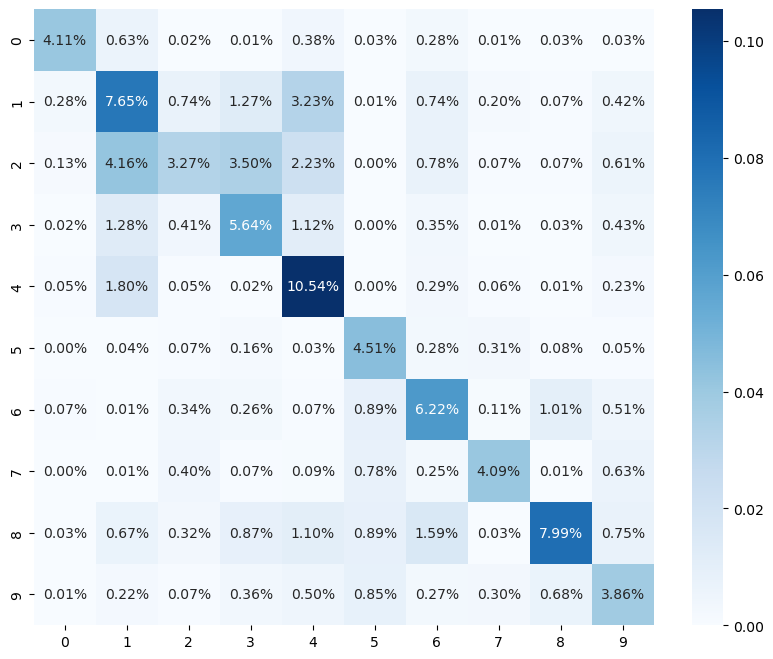

In [49]:
#Reference : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


import seaborn as sns
plt.figure(figsize=(10, 8)) 
sns.heatmap(confusion_matrix_gb/np.sum(confusion_matrix_gb), annot=True,  fmt='.2%', cmap='Blues')

In [50]:
tp_gb = confusion_matrix_gb.diagonal()
fn_gb = np.sum(confusion_matrix_gb, axis=1) - tp
fp_gb = np.sum(confusion_matrix_gb, axis=0) - tp
tn_gb = np.sum(confusion_matrix_gb) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate_gb = tp_gb / (tp_gb + fn_gb)

# FP Rate
fp_rate_gb = fp_gb / (fp_gb + tn_gb)

for class_label, tp, fp in zip(range(len(tp_rate_gb)), tp_rate_gb, fp_rate_gb):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.4265132893014731, 
FP Rate = 0.04486332594212645
Class 1: 
TP Rate = 0.34368266480588294, 
FP Rate = 0.14621025424384024
Class 2: 
TP Rate = 0.18098882290501964, 
FP Rate = 0.056489241502132935
Class 3: 
TP Rate = 0.3779206190101658, 
FP Rate = 0.11106583964155159
Class 4: 
TP Rate = 0.4470490108523217, 
FP Rate = 0.17617482624373745
Class 5: 
TP Rate = 0.44946741938384444, 
FP Rate = 0.07442248603897843
Class 6: 
TP Rate = 0.3961350104209245, 
FP Rate = 0.1017983334120574
Class 7: 
TP Rate = 0.39303152550239445, 
FP Rate = 0.049487854617129644
Class 8: 
TP Rate = 0.35972439911384185, 
FP Rate = 0.09498313118022873
Class 9: 
TP Rate = 0.35194647174885496, 
FP Rate = 0.06986468177922694


In [51]:
specificity_gb = []
unique_labels_gb = np.unique(y_train)

for i in range(len(unique_labels_gb)):
    true_negative_gb = np.sum(confusion_matrix_gb) - np.sum(confusion_matrix_gb[i, :]) - np.sum(confusion_matrix_gb[:, i]) + confusion_matrix_gb[i, i]
    total_negative_gb = np.sum(confusion_matrix_gb) - np.sum(confusion_matrix_gb[i, :])
    print(f'Label {unique_labels_gb[i]} specificity: {true_negative_gb / total_negative_gb}')

Label 0 specificity: 0.9937935843793584
Label 1 specificity: 0.8967592592592593
Label 2 specificity: 0.9716937354988399
Label 3 specificity: 0.9281045751633987
Label 4 specificity: 0.8993181818181818
Label 5 specificity: 0.9634588563458857
Label 6 specificity: 0.9465793304221252
Label 7 specificity: 0.9883966244725738
Label 8 specificity: 0.9766513056835637
Label 9 specificity: 0.9607801418439716


In [52]:
from sklearn.metrics import recall_score

sensitivity_gb = recall_score(y_train, predictions_gb, average=None)
for i in range(len(unique_labels_gb)):
    print(f'Label {unique_labels_gb[i]} sensitivity: {sensitivity_gb[i]}')

Label 0 sensitivity: 0.7428571428571429
Label 1 sensitivity: 0.5234234234234234
Label 2 sensitivity: 0.22088888888888888
Label 3 sensitivity: 0.6070921985815603
Label 4 sensitivity: 0.8080808080808081
Label 5 sensitivity: 0.8154761904761905
Label 6 sensitivity: 0.6555555555555556
Label 7 sensitivity: 0.646875
Label 8 sensitivity: 0.5615740740740741
Label 9 sensitivity: 0.5425925925925926


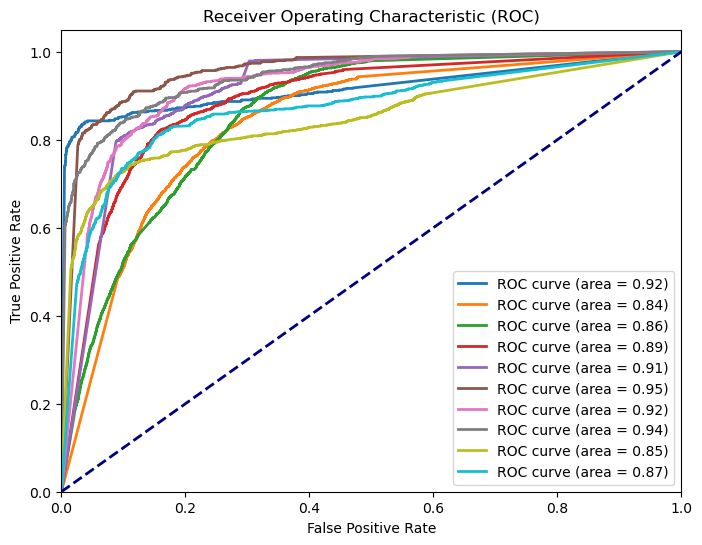

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities_gb = clf2.predict_proba(x_train)
roc_auc_scores_gb = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels_gb)):
    fpr_gb, tpr_gb, _ = roc_curve((y_train == unique_labels_gb[i]).astype(int), probabilities_gb[:, i])
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    roc_auc_scores_gb.append(roc_auc_gb)
    plt.plot(fpr_gb, tpr_gb, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gb))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##### Evaluation Using Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [55]:
scores = cross_val_score(clf2, x_train, y_train, scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.33530962 0.33465086 0.52700922 0.55072464 0.48814229 0.58498024
 0.51251647 0.49802372 0.63306983 0.57839262]
Mean: 0.5042819499341239
Standard deviation: 0.09431765125312233


In [56]:
scores = cross_val_score(clf2, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
clf2_rmse_scores = np.sqrt(-scores)
display_scores(clf2_rmse_scores)

Scores: [3.20562335 2.94727493 2.56226802 2.00772553 2.1008813  1.79939237
 1.78561076 1.95587019 1.67363497 1.81088787]
Mean: 2.1849169296776383
Standard deviation: 0.506530150155683


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 24

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()
gnb.fit(x_train_split, y_train_split)

predicted = gnb.predict(x_test_split)

In [58]:
accuracy = accuracy_score(y_test_split, predicted)
accuracy

0.5805884936319718

In [59]:
f1 = f1_score(y_test_split, predicted, average='macro')
f1

0.5981996414491064

In [60]:
conf_matrix = confusion_matrix(y_test_split, predicted)
conf_matrix

array([[201,  34,   1,   1,  12,   0,  17,   0,   1,   4],
       [ 14, 350,  37,  57, 174,   0,  28,   9,   2,  16],
       [  6, 189, 149, 149, 105,   0,  35,   4,   5,  17],
       [  2,  53,  19, 250,  48,   0,  22,   1,   1,  11],
       [  5,  76,   2,   2, 485,   0,  20,   3,   1,   3],
       [  0,   2,   4,   7,   4, 215,  23,  11,   3,   2],
       [  5,   1,  16,  13,   4,  46, 301,   3,  42,  10],
       [  0,   0,  16,   3,   3,  29,  23, 181,   0,  19],
       [  3,  25,   9,  42,  63,  56,  72,   1, 348,  22],
       [  1,   7,   0,  13,  24,  38,  25,  12,  22, 164]], dtype=int64)

### 5) Top Correlating Features - Feature Selection

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Defined the number of features to select for each class
no_of_features_per_class = [5, 10, 20]

# Dictionary stores the top features for each class and each dataset
top_features_per_cd = {}

x_train_class_vs_rest = onevrall_x_train

for class_label in range(10):
    onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
    y_train_path = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
    y_train_class_vs_rest = pd.read_csv(y_train_path)
    
    # Dictionary to store the top features for the current class
    top_features_per_class = {}
    
    # Trained a SVC for the one-vs-rest classifier
    classifier = OneVsRestClassifier(SVC(kernel='linear'))
    classifier.fit(x_train_class_vs_rest, y_train_class_vs_rest)
    
    # Get the coefficients (weights) for the features
    feature_weights = classifier.estimators_[0].coef_[0]
    
    # Sort the features by their absolute weights and select the top features
    for no_f in no_of_features_per_class:
        top_feature_indices = np.argsort(np.abs(feature_weights))[::-1][:no_f]
        top_features = x_train_class_vs_rest.columns[top_feature_indices]
        top_features_per_class[no_f] = top_features.tolist()

    top_features_per_cd[class_label] = top_features_per_class

final_datasets = {}
for i in range(10):
    for no_f in no_of_features_per_class:
        dataset_name = f"Data set {no_f}({i})"
        
        final_datasets[dataset_name] = pd.DataFrame(x_train_class_vs_rest[top_features_per_cd[i][no_f]])
print("30 Datasets for each class and for each top features [5,10,20]: \n", final_datasets)

final_3_datasets = {}
for no_f in no_of_features_per_class:
    dataset_name = f"Data set {no_f}"
    
    selected_features = []
    for class_label, top_features in top_features_per_cd.items():
        selected_features.extend(top_features[no_f])
    
    final_3_datasets[dataset_name] = x_train_class_vs_rest[selected_features]
print("3 Datasets Combined: \n", final_3_datasets)

30 Datasets for each class and for each top features [5,10,20]: 
 {'Data set 5(0)':        1080   1314   1272   1086   1315
0     142.0  195.0  176.0  123.0  166.0
1     130.0  226.0  212.0  185.0  192.0
2     157.0  194.0  204.0  161.0  148.0
3     151.0  161.0  192.0  177.0  121.0
4     168.0  224.0  170.0  139.0  192.0
...     ...    ...    ...    ...    ...
9685  111.0  113.0  101.0   18.0   92.0
9686  109.0  112.0  103.0   18.0   78.0
9687  104.0  106.0  102.0   19.0   62.0
9688   97.0   99.0   95.0   19.0   72.0
9689   92.0   94.0   91.0   15.0   58.0

[9690 rows x 5 columns], 'Data set 10(0)':        1080   1314   1272   1086   1315   1273   1319   1316   1268   1361
0     142.0  195.0  176.0  123.0  166.0  126.0  199.0  141.0  162.0  198.0
1     130.0  226.0  212.0  185.0  192.0  199.0  195.0  158.0  174.0  204.0
2     157.0  194.0  204.0  161.0  148.0  171.0  205.0  123.0  144.0  197.0
3     151.0  161.0  192.0  177.0  121.0  173.0  178.0  108.0  115.0  173.0
4     168.0  224.

In [62]:
dataset1 = final_3_datasets['Data set 5']
dataset2 = final_3_datasets['Data set 10']
dataset3 = final_3_datasets['Data set 20']

In [63]:
dataset1

,1080,1314,1272,1086,1315,1085,1038,801,1792,1167,...,1221,1314,1173,1362,1222,1475,1179,1519,1226,1471
0,142.0,195.0,176.0,123.0,166.0,162.0,121.0,98.0,127.0,211.0,...,160.0,195.0,157.0,160.0,146.0,78.0,199.0,179.0,155.0,185.0
1,130.0,226.0,212.0,185.0,192.0,198.0,175.0,91.0,112.0,122.0,...,167.0,226.0,193.0,218.0,151.0,99.0,133.0,197.0,162.0,173.0
2,157.0,194.0,204.0,161.0,148.0,215.0,154.0,87.0,124.0,189.0,...,136.0,194.0,159.0,166.0,143.0,86.0,155.0,200.0,117.0,181.0
3,151.0,161.0,192.0,177.0,121.0,209.0,162.0,76.0,106.0,202.0,...,130.0,161.0,138.0,152.0,167.0,80.0,139.0,175.0,126.0,213.0
4,168.0,224.0,170.0,139.0,192.0,154.0,105.0,87.0,96.0,186.0,...,195.0,224.0,209.0,212.0,141.0,148.0,132.0,157.0,131.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,111.0,113.0,101.0,18.0,92.0,28.0,18.0,57.0,91.0,20.0,...,77.0,113.0,110.0,113.0,84.0,18.0,109.0,54.0,108.0,79.0
9686,109.0,112.0,103.0,18.0,78.0,34.0,17.0,91.0,71.0,18.0,...,48.0,112.0,106.0,111.0,83.0,17.0,104.0,60.0,91.0,70.0
9687,104.0,106.0,102.0,19.0,62.0,34.0,17.0,60.0,92.0,17.0,...,35.0,106.0,100.0,103.0,87.0,16.0,103.0,63.0,76.0,59.0
9688,97.0,99.0,95.0,19.0,72.0,36.0,15.0,14.0,92.0,16.0,...,30.0,99.0,91.0,98.0,84.0,16.0,95.0,70.0,62.0,42.0


### 6) Run Naïve Bayes Classifier on data sets created & Evaluation Metrics

Run the Gaussian Naïve Bayes Classifier on the 30 datasets created for each class and for each top correlating features 
[5,10,20].

In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

class_labels = list(range(10))

def evaluate_gaussian_nb(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_train, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_train, y_pred, average='macro', zero_division=1)
    roc_auc = roc_auc_score(y_train, nb_model.predict_proba(X_train), multi_class='ovr')
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

y_train_dict = {}
evaluation_metrics = []
dataset_number_features = [5, 10, 20]

for i in final_datasets:
    X_train_fr = final_datasets[i]
    
    y_train2 = np.array(no_aug_y_train).ravel()
    
    accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(X_train_fr, y_train2)

    evaluation_metrics.append({
        "Dataset": i,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Cross Val Scores": np.mean(cross_val_scores),
        "TP rate": recall, 
        "FP rate": 1 - recall
    })

df_evaluation_metrics = pd.DataFrame(evaluation_metrics)

In [65]:
df_evaluation_metrics

,Dataset,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Scores,TP rate,FP rate
0,Data set 5(0),0.333540,0.479578,0.283111,0.232298,0.753777,0.280908,0.283111,0.716889
1,Data set 10(0),0.280702,0.354109,0.298883,0.238846,0.758036,0.255315,0.298883,0.701117
2,Data set 20(0),0.279257,0.377625,0.351333,0.279185,0.765107,0.245304,0.351333,0.648667
3,Data set 5(1),0.321053,0.457388,0.248096,0.228310,0.754934,0.303302,0.248096,0.751904
4,Data set 10(1),0.288854,0.306583,0.264595,0.228723,0.740961,0.263158,0.264595,0.735405
5,Data set 20(1),0.278225,0.291605,0.326883,0.252759,0.759630,0.244066,0.326883,0.673117
6,Data set 5(2),0.309701,0.485199,0.242667,0.200660,0.762770,0.279567,0.242667,0.757333
7,Data set 10(2),0.360372,0.374208,0.332807,0.291813,0.772406,0.308978,0.332807,0.667193
8,Data set 20(2),0.363158,0.397175,0.411786,0.341627,0.781143,0.294840,0.411786,0.588214
9,Data set 5(3),0.296904,0.640462,0.201913,0.140102,0.730148,0.284107,0.201913,0.798087


Run the Gaussian Naïve Bayes Classifier on the final 3 combined datasets created of each class [5,10,20].

In [66]:
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

class_labels = list(range(10))

datasets = [dataset1, dataset2, dataset3]  
y_train_dict = {}
evaluation_metrics = []
dataset_number_features = [5, 10, 20]

for dataset_number, dataset in enumerate(datasets):
    X_train_fr = dataset
    
    for class_label in class_labels:
        y_train2 = np.array(no_aug_y_train).ravel()
        accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(X_train_fr, y_train2)

        evaluation_metrics.append({
            "Dataset": str(dataset_number_features[dataset_number]),
            "Class Label": class_label,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Cross Val Scores": np.mean(cross_val_scores),
            "TP rate": recall, 
            "FP rate": 1 - recall
        })

df3_evaluation_metrics = pd.DataFrame(evaluation_metrics)

In [67]:
df3_evaluation_metrics

,Dataset,Class Label,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Scores,TP rate,FP rate
0,5,0,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
1,5,1,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
2,5,2,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
3,5,3,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
4,5,4,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
5,5,5,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
6,5,6,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
7,5,7,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
8,5,8,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760
9,5,9,0.334572,0.435038,0.434240,0.360589,0.785957,0.303096,0.434240,0.565760


In [68]:
import pandas as pd

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for metric in metrics:
    for dataset_number in [5, 10, 20]:
        dataset_metrics = df3_evaluation_metrics[df3_evaluation_metrics['Dataset'] == str(dataset_number)]
        print(metric, f" for {dataset_number}: ", np.mean(dataset_metrics[metric]))

Accuracy  for 5:  0.3345717234262126
Accuracy  for 10:  0.33684210526315794
Accuracy  for 20:  0.3392156862745098
Precision  for 5:  0.435037825696342
Precision  for 10:  0.4234070307947574
Precision  for 20:  0.44069566474368005
Recall  for 5:  0.4342399488878212
Recall  for 10:  0.4508377775952245
Recall  for 20:  0.456407718951336
F1 Score  for 5:  0.36058934158632816
F1 Score  for 10:  0.3673556658606679
F1 Score  for 20:  0.3673362401778616
ROC AUC  for 5:  0.785956585492279
ROC AUC  for 10:  0.788423430881678
ROC AUC  for 20:  0.7876264601099641


Test-train split on the 3 datasets and the mean accuracies.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed_value = 24

accuracies = []

for i in final_datasets:
    no_aug_y_train = np.asarray(no_aug_y_train).ravel()
    x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(final_datasets[i], no_aug_y_train, test_size=0.3, random_state=seed_value)

    gnb = GaussianNB()
    gnb.fit(x_train_split, y_train_split)

    predictions_gb = gnb.predict(x_test_split)
    
    accuracy_gb = accuracy_score(y_test_split, predictions_gb)
    accuracies.append(accuracy_gb)

accuracies = np.array(accuracies)

for i in range(3):
    l = [5,10,20]
    acc_l = []
    for j in range(0+i, len(accuracies), 3):
        acc_l.append(accuracies[j])
    print(f"Mean Accuracy for Dataset {l[i]} = ", np.mean(acc_l))
print("Mean Accuracy of all 3 datasets = ", accuracies.mean())

Mean Accuracy for Dataset 5 =  0.30041279669762644
Mean Accuracy for Dataset 10 =  0.30371517027863776
Mean Accuracy for Dataset 20 =  0.3004815961472308
Mean Accuracy of all 3 datasets =  0.301536521041165


### Explored the Coffee Leaf dataset that we used in Lab 4 and Lab 5

#### JMuBEN dataset

### 1) Loading the dataset

In [70]:
import os
import requests
import zipfile
import numpy as np

dataset_url = 'https://github.com/ishaqmarashy/DATALFS/raw/main/JMuBEN.zip'
dataset_dir = './JMuBEN'

# create directory for dataset if it does not exist
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    
# append JMuBEN.zip to the end of the path (this is where we download the file to)
zip_file_path = os.path.join(dataset_dir, 'JMuBEN.zip')


# check if file is downloaded already
if not os.path.exists(zip_file_path):
    
    # file is not downloaded so fetch the file
    response = requests.get(dataset_url)
    
    # write file to storage which is recieved from the response
    with open(zip_file_path, 'wb') as zip_file:
        zip_file.write(response.content)
        
    # unzip to zip file path
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

# within the concat train and test to become ./JMuBEN/train and JMuBEN ./JMuBEN/test
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [71]:
def load_images_and_labels(directory):
    images = []
    labels = []
    
    # get subdirectories Healthy and Miner
    
    for class_name in os.listdir(directory):
        
        # concat subdirectory to get full path
        class_dir = os.path.join(directory, class_name)
        # assign labels using class subdirectory
        # label is determined by filepath
        label = 0 if class_name == 'Miner' else 1
        
        # append labels and image paths to labels and images respectively
        for filename in os.listdir(class_dir):
            images.append(os.path.join(class_dir, filename))
            labels.append(label)
            
    return images, labels

# load file directories and their labels
train_images_dir, train_labels = load_images_and_labels(train_dir)
test_images_dir, test_labels = load_images_and_labels(test_dir)

In [72]:
# print the number of images and labels
print(f"Train images:{len(train_images_dir)}  Labels:{len(train_labels)}")
print(f"Test images:{len(test_images_dir)}  Labels:{len(test_labels)}")

Train images:24000  Labels:24000
Test images:6000  Labels:6000


#### 2) Pre-processing

In [73]:
import cv2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def load_grayscale_images(image_paths):
    loaded_images = []
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  #  grayscale
        loaded_images.append(img)
    return loaded_images

def resize_images(images_to_resize):
    resized_images = []
    for img in images_to_resize:
        resized_img = cv2.resize(img, (128, 128))  # resize
        resized_images.append(resized_img)
    return resized_images

def normalize_image(images_to_normalize):
    normalized_images = []
    for img in images_to_normalize:
        normalized_img = img / 255.0  # normalize
        normalized_images.append(normalized_img)
    return normalized_images

image_pipeline = Pipeline(steps=[
    ('load_grayscale_images', FunctionTransformer(load_grayscale_images)),
    ('resize_images', FunctionTransformer(resize_images)),
    ('normalize_image', FunctionTransformer(normalize_image))
])


train_images=image_pipeline.transform(train_images_dir)
test_images=image_pipeline.transform(test_images_dir)

In [74]:
print(len(train_images))
print(len(test_images))

24000
6000


#### 3) Data Visualisation

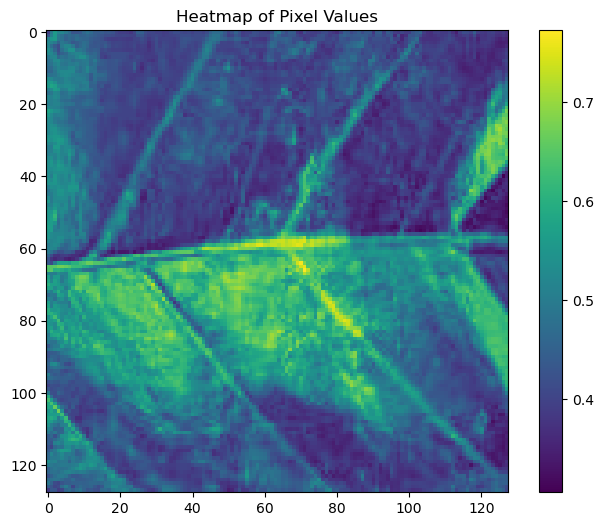

In [75]:
import matplotlib.pyplot as plt

sample_image = train_images[3]

plt.figure(figsize=(8, 6))
plt.imshow(sample_image, cmap='viridis')  
plt.colorbar()
plt.title('Heatmap of Pixel Values')
plt.show()

In [76]:
import numpy as np

image = train_images[3]
pixel_values = image.reshape(-1)  # Flatten the image into a 1D array
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
min_pixel_value = np.min(pixel_values)
max_pixel_value = np.max(pixel_values)

 
print(f"Mean Pixel Value: {mean_pixel_value}")
print(f"Standard Deviation of Pixel Values: {std_pixel_value}")
print(f"Minimum Pixel Value: {min_pixel_value}")
print(f"Maximum Pixel Value: {max_pixel_value}")

Mean Pixel Value: 0.4733644971660539
Standard Deviation of Pixel Values: 0.08958183250039525
Minimum Pixel Value: 0.3058823529411765
Maximum Pixel Value: 0.7725490196078432


In [77]:
from collections import Counter

# Calculate class counts
class_counts_train= Counter(train_labels)
print(class_counts_train)

class_counts_test = Counter(test_labels)
print(class_counts_test)

Counter({1: 12000, 0: 12000})
Counter({1: 3000, 0: 3000})


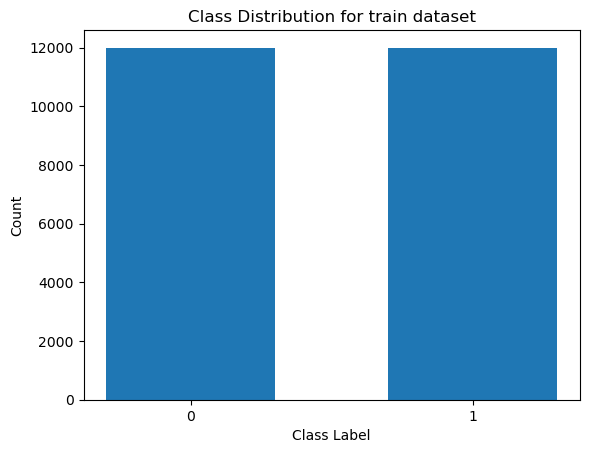

In [78]:
# Example: Histogram of class distribution
plt.hist(train_labels, bins=[0, 1,2], align='left', rwidth=0.6)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution for train dataset')
plt.show()

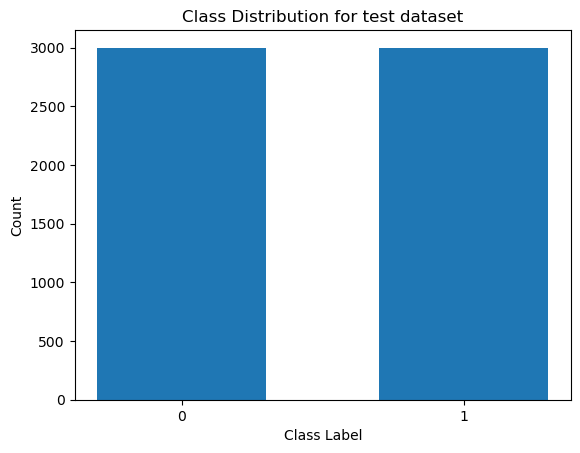

In [79]:
# Example: Histogram of class distribution
plt.hist(test_labels, bins=[0, 1,2], align='left', rwidth=0.6)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution for test dataset')
plt.show()

In [80]:
#Reference : https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b


import os
import cv2
import numpy as np

# Get the current working directory as the root path
root_path = os.path.join(os.getcwd(), "JMuBEN")


sizes = []
resolutions = []
color_distributions = []

# Iterate through all images present 
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)
            size = os.path.getsize(img_path)
            sizes.append(size)
            r = img.shape[:2]
            resolutions.append(r)
            cd = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(cd)

            
color_distributions = np.array(color_distributions)
sizes = np.array(sizes)
resolutions = np.array(resolutions)


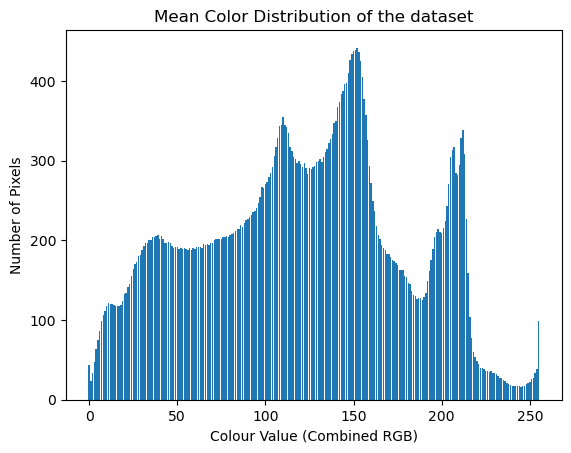

In [81]:
mean_color_distribution = np.mean(color_distributions, axis=0) #mean colour distribution

# bar graph
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution of the dataset")
plt.xlabel("Colour Value (Combined RGB)")
plt.ylabel("Number of Pixels")
plt.show()

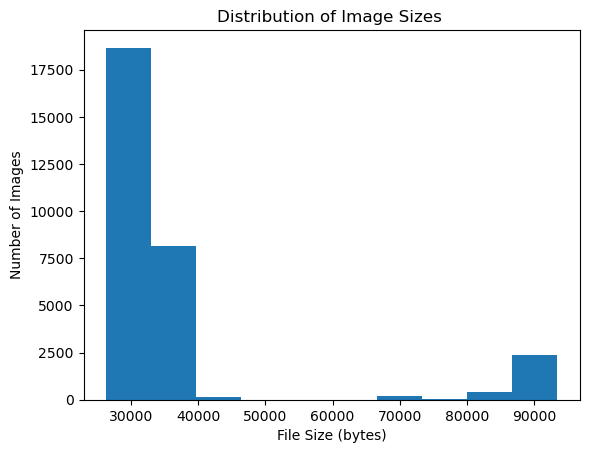

In [82]:
# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes ")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

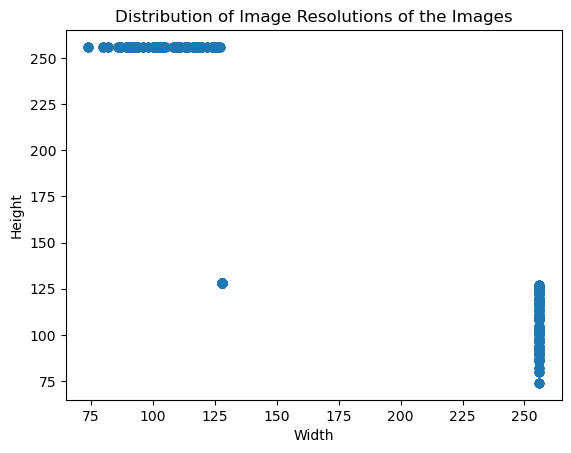

In [83]:
# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions of the Images")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

#### 4) Exploring Image Processing Techniques

##### · Canny Edge Detection

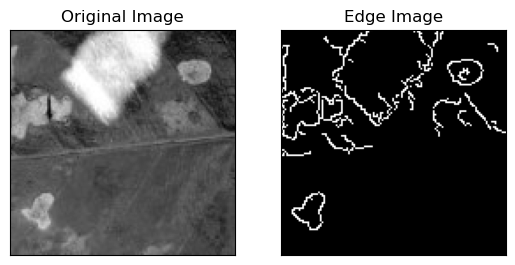

In [84]:
#Reference : https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

import cv2 as cv
from matplotlib import pyplot as plt

img_path  = os.path.join(os.getcwd(), "JMuBEN/train/Miner/1 (4471).jpg")
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

##### · Image Segmentation

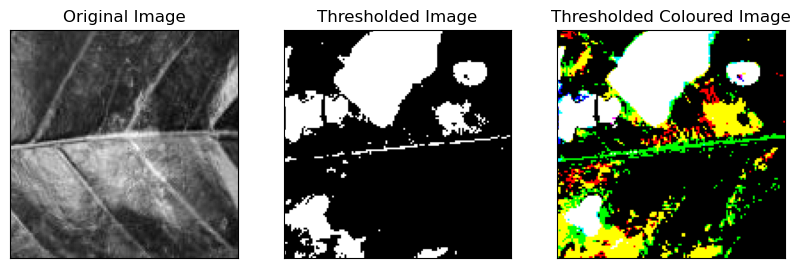

In [85]:
#Reference : https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_grayscale = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image_normal = cv2.imread(img_path)

#threshold to segment the image
threshold_value = 130  
ret, thresholded_image = cv2.threshold(image_grayscale, threshold_value, 255, cv2.THRESH_BINARY)
ret, thresholded_image_coloured = cv2.threshold(image_normal, threshold_value, 255, cv2.THRESH_BINARY)

# Display 
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresholded_image_coloured, cmap='gray')
plt.title('Thresholded Coloured Image'), plt.xticks([]), plt.yticks([])

plt.show()

#### 5) Model Training

In [86]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)


train_images = train_images.reshape(train_images.shape[0], -1)
train_labels = train_labels.reshape(train_images.shape[0], -1)

In [87]:
# Utilizing Gaussian Naive Bayes for classification
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
train_labels = train_labels.ravel()
clf2.fit(train_images, train_labels)
predictions2 = clf2.predict(train_images)

#### 6) Evaluation Metrics

In [88]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_labels, predictions2)
print('Accuracy = ', accuracy)

Accuracy =  0.6695833333333333


In [89]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusion_matrix = confusion_matrix(train_labels, predictions2)
confusion_matrix

array([[9190, 2810],
       [5120, 6880]], dtype=int64)

<Axes: >

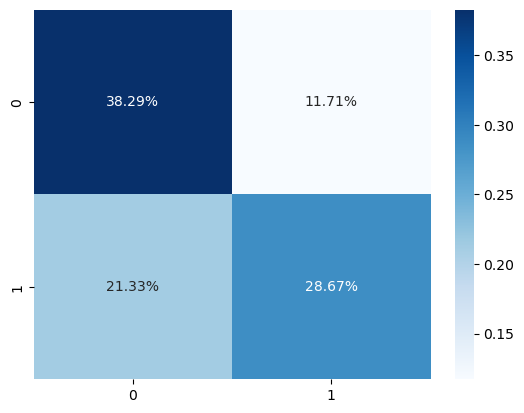

In [90]:

#Reference : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,  fmt='.2%', cmap='Blues')

In [91]:
from sklearn.metrics import precision_score, recall_score
tp = confusion_matrix[0,0]
print("TP = ", tp)
fp = confusion_matrix[1,0]
print("FP = ", fp)
tn = confusion_matrix[1,1]
print("TN = ", tn)
fn = confusion_matrix[0,1]
print("FN = ", fn)
sensitivity = tp / (tp + fn)
print('Sensitivity = ', sensitivity)
specificity = tn/ (fp + tn)
print('Specificity = ', specificity)
precision = precision_score(train_labels, predictions2)
print('Precision = ', precision)
recall = recall_score(train_labels, predictions2)
print('Recall = ', recall)

TP =  9190
FP =  5120
TN =  6880
FN =  2810
Sensitivity =  0.7658333333333334
Specificity =  0.5733333333333334
Precision =  0.7100103199174407
Recall =  0.5733333333333334


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.62')

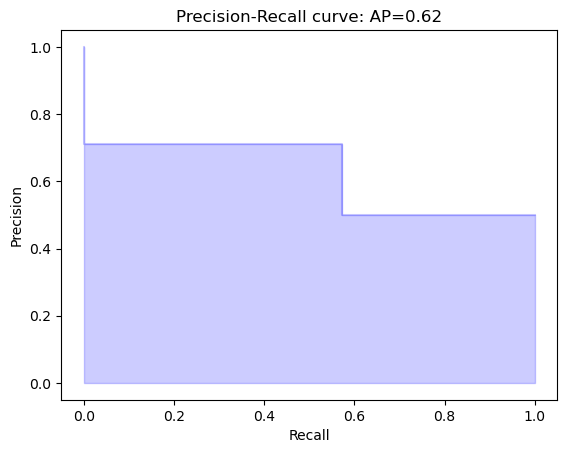

In [92]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, _ = precision_recall_curve(train_labels, predictions2)
average_precision = average_precision_score(train_labels, predictions2)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Area Under Curve =  0.6686722222222221


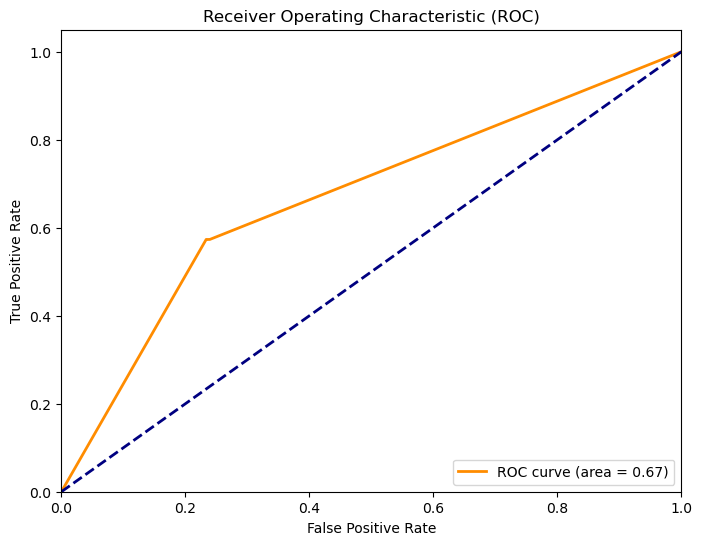

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for the positive class
probabilities = clf2.predict_proba(train_images)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(train_labels, probabilities)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print("Area Under Curve = ", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(clf2, train_images, train_labels, scoring="accuracy", cv=10)

def display_scores(scores):
    print("Scores:", scores2)
    print("Mean:", scores2.mean())
    print("Standard deviation:", scores2.std())

display_scores(scores2)

Scores: [0.6625     0.57291667 0.66291667 0.73041667 0.65041667 0.70166667
 0.66       0.66375    0.70458333 0.6825    ]
Mean: 0.6691666666666667
Standard deviation: 0.04006548459154783


In [95]:
scores2 = cross_val_score(clf2, train_images, train_labels, scoring="neg_mean_squared_error", cv=10)
clf2_rmse_scores = np.sqrt(-scores2)

display_scores(clf2_rmse_scores)

Scores: [-0.3375     -0.42708333 -0.33708333 -0.26958333 -0.34958333 -0.29833333
 -0.34       -0.33625    -0.29541667 -0.3175    ]
Mean: -0.3308333333333333
Standard deviation: 0.040065484591547816


In [96]:
from sklearn.metrics import classification_report

report = classification_report(train_labels, predictions2)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.77      0.70     12000
           1       0.71      0.57      0.63     12000

    accuracy                           0.67     24000
   macro avg       0.68      0.67      0.67     24000
weighted avg       0.68      0.67      0.67     24000



In [97]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.7658333333333334, 
FP Rate = 0.4266666666666667
Class 1: 
TP Rate = 0.5733333333333334, 
FP Rate = 0.23416666666666666


In [98]:
specificity = []
unique_labels = np.unique(train_labels)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.5733333333333334
Label 1 specificity: 0.7658333333333334


In [99]:
from sklearn.metrics import recall_score

sensitivity = recall_score(train_labels, predictions2, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.7658333333333334
Label 1 sensitivity: 0.5733333333333334


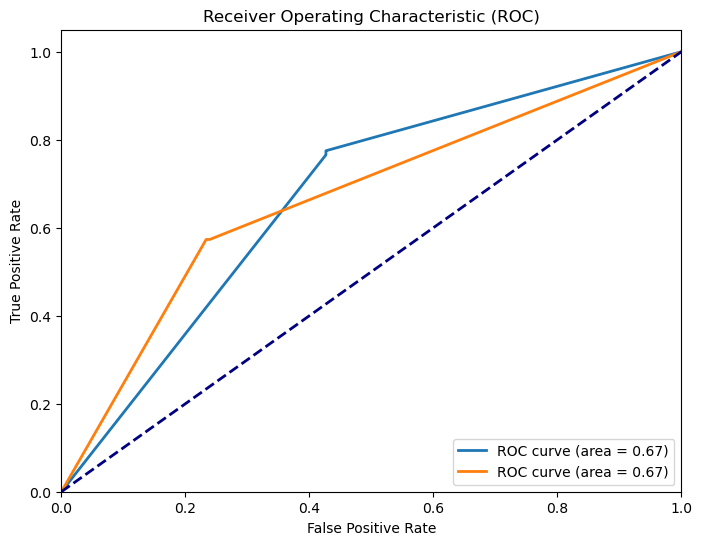

In [100]:
#plotting ROC curve for each class
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf2.predict_proba(train_images)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((train_labels == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##### Implemented PCA:

In [101]:

import pandas as pd
from sklearn.decomposition import PCA
  
# Reduce to 5 features
num_components = 5 
pca = PCA(num_components)
train_reduced5 = pca.fit_transform(train_images)
# Reduce to 10 features
num_components = 10 
pca = PCA(num_components)
train_reduced10 = pca.fit_transform(train_images)
# Reduce to 20 features
num_components = 20
pca = PCA(num_components)
train_reduced20 = pca.fit_transform(train_images)

train_labels = pd.DataFrame(train_labels)

result5 = pd.concat([train_labels, pd.DataFrame(train_reduced5,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])], axis=1)
print(result5)
result10 = pd.concat([train_labels, pd.DataFrame(train_reduced10,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])], axis=1)
print(result10)
result20 = pd.concat([train_labels, pd.DataFrame(train_reduced20,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20'])], axis=1)
print(result20)

       0       PCA1      PCA2       PCA3      PCA4       PCA5
0      1   9.426007 -0.943146  -3.665052  1.462299  -2.973688
1      1   5.741793 -1.221387  -2.408687  3.508754  -4.012117
2      1   7.881397 -0.872478  -3.751193  0.793166  -4.371894
3      1   7.881397 -0.872478  -3.751193  0.793166  -4.371894
4      1   8.575934 -0.676472  -4.566672 -0.234586  -2.913762
...   ..        ...       ...        ...       ...        ...
23995  0  15.130311 -3.311513  10.332189  0.898293  10.094291
23996  0  14.990442 -3.415553  10.410641  0.905302  10.292265
23997  0  11.408903 -9.452195   5.658969  4.350896   3.940361
23998  0  13.539863 -6.121348   3.010887  2.492434   1.195796
23999  0  15.556328 -5.724176   3.009962  1.700200  -1.090436

[24000 rows x 6 columns]
       0       PCA1      PCA2       PCA3      PCA4       PCA5      PCA6  \
0      1   9.426007 -0.943146  -3.665052  1.462304  -2.973627  0.025814   
1      1   5.741793 -1.221387  -2.408687  3.508752  -4.012132  0.321442   
2    

In [102]:
from sklearn.naive_bayes import GaussianNB

def evaluate_gaussian_nb(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

In [103]:
accuracies = []

accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(result5[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']], result5[0])
accuracies.append(accuracy)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC AUC = ", roc_auc)
print("Cross Validation Score = ", cross_val_scores)

Accuracy =  0.854125
Precision =  0.8180049390107011
Recall =  0.9109166666666667
F1 =  0.8619642786736584
ROC AUC =  0.8541249999999999
Cross Validation Score =  [0.80541667 0.90291667 0.84083333 0.8675     0.85958333 0.83916667
 0.87       0.85375    0.82875    0.89416667]


In [104]:
accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(result10[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10']], result10[0])
accuracies.append(accuracy)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC AUC = ", roc_auc)
print("Cross Validation Score = ", cross_val_scores)

Accuracy =  0.8556666666666667
Precision =  0.8474438293715402
Recall =  0.8675
F1 =  0.8573546367978916
ROC AUC =  0.8556666666666667
Cross Validation Score =  [0.78916667 0.89666667 0.8525     0.88583333 0.82916667 0.87208333
 0.85166667 0.86       0.82541667 0.90833333]


In [105]:
accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(result20[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20']], result20[0])
accuracies.append(accuracy)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC AUC = ", roc_auc)
print("Cross Validation Score = ", cross_val_scores)

Accuracy =  0.8928333333333334
Precision =  0.9100556715379262
Recall =  0.8718333333333333
F1 =  0.890534559073885
ROC AUC =  0.8928333333333334
Cross Validation Score =  [0.83083333 0.89333333 0.8525     0.90166667 0.89666667 0.88666667
 0.90708333 0.9        0.88416667 0.91208333]


In [106]:
print('Mean Accuracy = ', np.mean(accuracies))

Mean Accuracy =  0.8675416666666668
